In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# neusmeren beztezinski graf
G = nx.Graph()

# KREIRANJE CVOROVA

# Ucitavanje linija
routesPath = "../Desktop/asmPodaci/routes.txt"
routes = pd.read_csv(routesPath)

for route in routes.itertuples(index=False):
    route_id = route.route_id
    route_short_name = route.route_short_name
    route_long_name = route.route_long_name
    route_type = route.route_type
    G.add_node(route_id, shortName=route_short_name, name=route_long_name, routeType=route_type)
    
# KREIRANJE GRANA

tripStopTimesPath = "../Desktop/sredjeniPodaci/tripStopTimes.txt"
tripStopTimes = pd.read_csv(tripStopTimesPath, sep='\t')

# izbacujem nocne linije jer se u zadatku trazi ispitivanje za dnevni rezim
tripStopTimes = tripStopTimes[~(((tripStopTimes['route_id'].astype(str).str.startswith('50')) & (tripStopTimes['route_id'] >= 50015)) |
                    ((tripStopTimes['route_id'].astype(str).str.startswith('51')) & (tripStopTimes['route_id'] >= 51015)) |
                    ((tripStopTimes['route_id'].astype(str).str.startswith('52')) & (tripStopTimes['route_id'] >= 52015)) |
                    ((tripStopTimes['route_id'].astype(str).str.startswith('53')) & (tripStopTimes['route_id'] >= 53015)))]

tripStopTimes = tripStopTimes.dropna(subset=['stop_id'])

# grupisem po stop_id i onda pravim tuplove svih tih pa ih onda spajam
groupedTripStopStopTimes = tripStopTimes.groupby('stop_id')

for _, group in groupedTripStopStopTimes:
    route_ids = group['route_id'].unique()  # Svi jedinstveni route_id za ovu grupu
    route_combinations = combinations(route_ids, 2)  # Svi parovi route_id u ovoj grupi
    
    # dodavanje grana u graf
    for route_pair in route_combinations:
        if G.has_edge(route_pair[0], route_pair[1]):
            G.edges[route_pair[0], route_pair[1]]['weight'] += 1
        else:
            G.add_edge(route_pair[0], route_pair[1], weight=1)

1635090
1635090


In [7]:
print("Broj čvorova (linija):", G.number_of_nodes())
print("Broj grana:", G.number_of_edges())

# Pronalaženje čvorova sa self loop
nodes_with_selfloops = [node for node in G.nodes if G.has_edge(node, node)]

# Ispisivanje čvorova sa self loop
print("Čvorovi sa self loop:")
for node in nodes_with_selfloops:
    print(node)

Broj čvorova (linija): 214
Broj grana: 1985
Čvorovi sa self loop:


In [20]:
# br povezanih komponenti
numOfConnectedComponents = nx.number_connected_components(G)
print("Br povezanih komponenti: ", numOfConnectedComponents)

# velicina povezanih komponenata
sizeOfConnectedComponents = [len(component) for component in nx.connected_components(G)]
print("Velicine povezanih komp: ", sizeOfConnectedComponents)

Br povezanih komponenti:  38
Velicine povezanih komp:  [177, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [21]:
# uklanjanjam sve nepovezane komponente

connected_components = list(nx.connected_components(G))

# komponente sa veličinom 1
components_to_remove = [component for component in connected_components if len(component) == 1]

for component in components_to_remove:
    G.remove_nodes_from(component)
    
# br povezanih komponenti
numOfConnectedComponents = nx.number_connected_components(G)
print("Br povezanih komponenti: ", numOfConnectedComponents)

# velicina povezanih komponenata
sizeOfConnectedComponents = [len(component) for component in nx.connected_components(G)]
print("Velicine povezanih komp: ", sizeOfConnectedComponents)

Br povezanih komponenti:  1
Velicine povezanih komp:  [177]


In [22]:
output_path = "../Desktop/asmPodaci/Cgraph.gml"

nx.write_gml(G, output_path)

In [23]:
numOfNodes = G.number_of_nodes()
numOfEdges = G.number_of_edges()

density = 2 * numOfEdges / (numOfNodes * (numOfNodes - 1))

print("Gustina L mreze:", density)

Gustina L mreze: 0.12743965074473548


In [ ]:
averageDistance = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)

print("Prosecna distanca:", averageDistance)
print("Dijametar:", diameter)

In [25]:
# br povezanih komponenti
numOfConnectedComponents = nx.number_connected_components(G)
print("Br povezanih komponenti: ", numOfConnectedComponents)

# velicina povezanih komponenata
sizeOfConnectedComponents = [len(component) for component in nx.connected_components(G)]
print("Velicine povezanih komp: ", sizeOfConnectedComponents)

# provera postojanja gigantske komp
hasGiantComponent = max(sizeOfConnectedComponents) > 1
print("Postoji gigantska komp: ", hasGiantComponent)

# izracunavanje centralizacije
max_degree = max(dict(G.degree()).values()) # sadrzi cvorove kao kljuceve i njihov stepen kao vrednost
centralization = (sum([max_degree - degree for degree in dict(G.degree()).values()])) / ((len(G) - 1) * (len(G) - 2))
print("Centralizacija:", centralization)

Br povezanih komponenti:  1
Velicine povezanih komp:  [177]
Postoji gigantska komp:  True
Centralizacija: 0.19866883116883116


Prosečni koef klasterizacije: 0.6101345694294864
Globalni koef klasterizacije: 0.49038562941610714


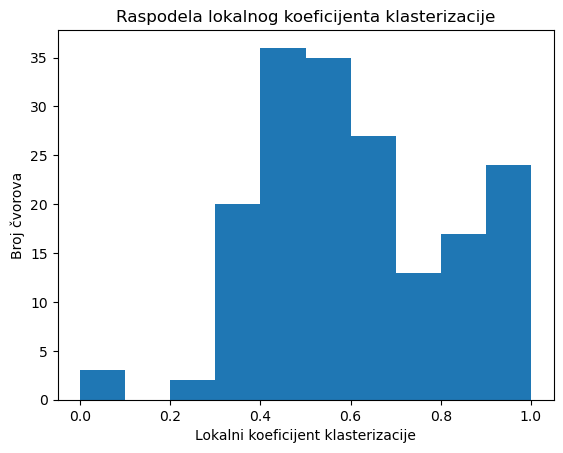

Prosečni koeficijent klasterizacije (Erdos-Renyi): 0.19690008454061075
Prosečni koeficijent klasterizacije (Scale-free): 0.09252069150468915


In [26]:
averageClusteringCoef = nx.average_clustering(G)
globalClusteringCoef = nx.transitivity(G) # compute graph transitivity, the fraction of all possible triangles present in G

print("Prosečni koef klasterizacije:", averageClusteringCoef)
print("Globalni koef klasterizacije:", globalClusteringCoef)

localClusteringCoeffs = nx.clustering(G)
plt.hist(list(localClusteringCoeffs.values()), bins=10)
plt.xlabel('Lokalni koeficijent klasterizacije')
plt.ylabel('Broj čvorova')
plt.title('Raspodela lokalnog koeficijenta klasterizacije')
plt.show()

# Generisanje Erdos-Renyi mreže
erdosRenyiGraph = nx.erdos_renyi_graph(n=len(G.nodes), p=0.2)
erdosRenyiAvgClustering = nx.average_clustering(erdosRenyiGraph)

# Generisanje scale-free mreže
scaleFreeGraph = nx.barabasi_albert_graph(n=len(G.nodes), m=2)
scaleFreeAvgClustering = nx.average_clustering(scaleFreeGraph)

print("Prosečni koeficijent klasterizacije (Erdos-Renyi):", erdosRenyiAvgClustering)
print("Prosečni koeficijent klasterizacije (Scale-free):", scaleFreeAvgClustering)

In [27]:
# izracunavanje koef asortativnosti
assortativity = nx.degree_assortativity_coefficient(G)
print("Koeficijent asortativnosti:", assortativity)

output_path = "../Desktop/asmPodaci/Pgraph.gml"

nx.write_gml(G, output_path)

Koeficijent asortativnosti: 0.13076990250619883


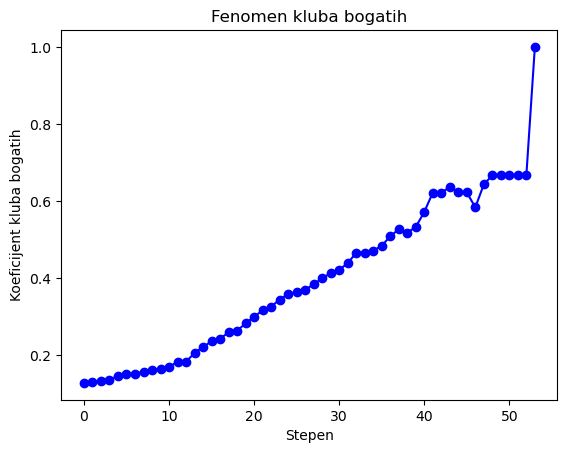

Mreža ne ispoljava rich club phenomenon.


In [28]:
richClubCoeffs = nx.rich_club_coefficient(G, normalized=False)

plt.plot(list(richClubCoeffs.keys()), list(richClubCoeffs.values()), 'bo-')
plt.xlabel('Stepen')
plt.ylabel('Koeficijent kluba bogatih')
plt.title('Fenomen kluba bogatih')
plt.show()

if max(richClubCoeffs.values()) > 1:
    print("Mreža ispoljava rich club phenomenon.")
else:
    print("Mreža ne ispoljava rich club phenomenon.")

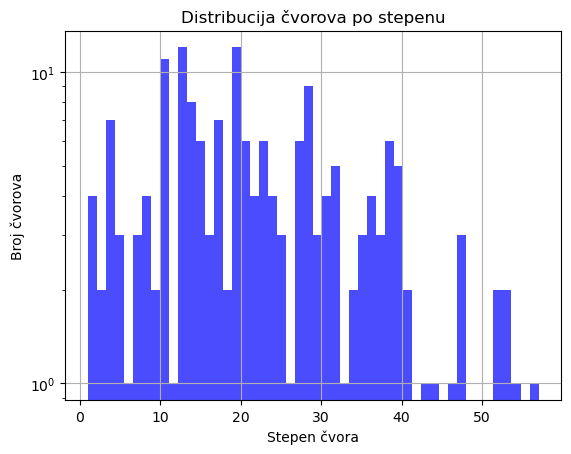

In [29]:
# Izračunavanje distribucije čvorova po stepenu
degree_distribution = dict(G.degree())

# Izračunavanje histograma distribucije čvorova po stepenu
degree_values = list(degree_distribution.values())
plt.hist(degree_values, bins=50, log=True, color='b', alpha=0.7)

# Podešavanje grafičkih elemenata
plt.xlabel('Stepen čvora')
plt.ylabel('Broj čvorova')
plt.title('Distribucija čvorova po stepenu')
plt.grid(True)

# Prikazivanje histograma
plt.show()

In [30]:
# Analiza centralnosti po stepenu
degree_centrality = nx.degree_centrality(G)

# centralnost po bliskosti
closeness_centrality = nx.closeness_centrality(G)

# relacionа centralnost
betweenness_centrality = nx.betweenness_centrality(G)

# Centralnost po stepenu sortirano
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Najvažniji akteri po centralnosti po stepenu:")
print(sorted_degree_centrality[:10])

# Centralnost po bliskosti sortirano
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Najvažniji akteri po centralnosti po bliskosti:")
print(sorted_closeness_centrality[:10])

# Relaciona centralnost sortirano
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Najvažniji akteri po relacionoj centralnosti:")
print(sorted_betweenness_centrality[:10])  # Prikaz prvih 10 najvažnijih aktera

Najvažniji akteri po centralnosti po stepenu:
[(50, 0.32386363636363635), (85, 0.3068181818181818), (37, 0.30113636363636365), (78, 0.30113636363636365), (23, 0.29545454545454547), (88, 0.29545454545454547), (58, 0.2727272727272727), (74, 0.2727272727272727), (83, 0.26704545454545453), (90002, 0.26136363636363635)]
Najvažniji akteri po centralnosti po bliskosti:
[(85, 0.5714285714285714), (50, 0.5641025641025641), (23, 0.5517241379310345), (37, 0.55), (78, 0.5482866043613707), (83, 0.544891640866873), (88, 0.5415384615384615), (95, 0.5415384615384615), (90003, 0.5398773006134969), (90002, 0.5382262996941896)]
Najvažniji akteri po relacionoj centralnosti:
[(50, 0.08633415045946774), (85, 0.07007840806530528), (90001, 0.050743869598347896), (78, 0.0496900583571727), (101, 0.04633129416232731), (95, 0.03728320035859138), (88, 0.03615123742781324), (94, 0.03524915007374696), (23, 0.033707723158269656), (83, 0.03365439576605044)]


In [31]:
# Računanje vrednosti centralnosti po sopstvenom vektoru
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sortiranje
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Prikazivanje najvažnijih čvorova
print("Najvažniji čvorovi po centralnosti po sopstvenom vektoru:")
print(sorted_eigenvector_centrality[:10])

Najvažniji čvorovi po centralnosti po sopstvenom vektoru:
[(85, 0.16952771735411476), (88, 0.1619638677870404), (23, 0.15657626150936813), (37, 0.15522387756323527), (58, 0.15112317573852294), (78, 0.15007078482904265), (74, 0.14324782493111918), (90002, 0.14122606520045636), (16, 0.13555220065190424), (83, 0.13231978988186935)]


In [32]:
weight_degree = 1
weight_closeness = 0.5
weight_betweenness = 0.8
weight_eigenvector = 0.3

# Izračunavanje kompozitne mere centralnosti za svaki čvor
composite_centrality = {}
for node in G.nodes():
    composite_centrality[node] = (
        weight_degree * degree_centrality[node] +
        weight_closeness * closeness_centrality[node] +
        weight_betweenness * betweenness_centrality[node] +
        weight_eigenvector * eigenvector_centrality[node]
    )

# Sortiranje čvorova
sorted_composite_centrality = sorted(composite_centrality.items(), key=lambda x: x[1], reverse=True)

# Prikazivanje najvažnijih čvorova
print("Najvažniji čvorovi prema kompozitnoj meri centralnosti:")
print(sorted_composite_centrality[:10])

Najvažniji čvorovi prema kompozitnoj meri centralnosti:
[(50, 0.7119881065559033), (85, 0.6994535091909461), (78, 0.6600529479514999), (23, 0.6452556713994889), (37, 0.6445556340227504), (88, 0.643733926502139), (83, 0.6061107285562921), (74, 0.6026987488565773), (58, 0.5943023174791202), (90002, 0.5859586126401044)]
